In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import tensorflow as tf

## 1. 단순 선형회귀 모델의 비용 구하기

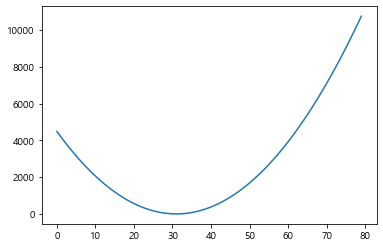

In [2]:
##### 데이터 준비
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.placeholder(tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot-y_train))

# ------------------ 그래프 완성 -------------------------- #

sess = tf.Session()

cost_val = []
for i in range(-30 , 50):
    result = sess.run(cost, feed_dict={W:i})
    cost_val.append(result)
    
plt.plot(cost_val)
sess.close()

### (1) 경사 하강 알고리즘을 이용한 가중치 학습

In [14]:
##### 데이터 준비
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx + b)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot-y_train))

##### 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
gradient = tf.reduce_mean((hypot-y_train) * x_train)
learning_rate = 0.01
descent = W - (learning_rate * gradient)
update = W.assign(descent)

# -------------------------- 그래프 완성 ---------------------------- #

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(50):
    _, weight, c = sess.run([update, W, cost])
    print(step, weight, c)
    
sess.close()

0 [-0.41939673] 7.861913
1 [-0.36174887] 7.147659
2 [-0.30679125] 6.4985123
3 [-0.25439832] 5.908539
4 [-0.2044504] 5.3723454
5 [-0.15683338] 4.885029
6 [-0.11143849] 4.4421344
7 [-0.06816202] 4.0396113
8 [-0.02690513] 3.6737807
9 [0.01242644] 3.341298
10 [0.04992253] 3.0391226
11 [0.08566881] 2.7644923
12 [0.11974692] 2.5148962
13 [0.15223473] 2.2880518
14 [0.18320644] 2.081886
15 [0.2127328] 1.8945131
16 [0.24088128] 1.7242203
17 [0.26771614] 1.5694505
18 [0.29329872] 1.4287891
19 [0.31768745] 1.3009496
20 [0.34093803] 1.1847633
21 [0.3631036] 1.0791682
22 [0.38423476] 0.98319864
23 [0.40437979] 0.8959771
24 [0.42358473] 0.8167065
25 [0.44189343] 0.7446618
26 [0.45934772] 0.67918426
27 [0.4759875] 0.61967546
28 [0.49185073] 0.56559116
29 [0.5069737] 0.5164371
30 [0.5213909] 0.4717636
31 [0.5351353] 0.43116224
32 [0.54823834] 0.39426205
33 [0.56072986] 0.36072543
34 [0.57263845] 0.330246
35 [0.58399135] 0.3025449
36 [0.5948144] 0.2773687
37 [0.6051324] 0.2544876
38 [0.6149689] 0.23369

In [18]:
##### 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx + b)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot-y_train))

##### 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
gradient = tf.reduce_mean((hypot-y_train) * x_train)
learning_rate = 0.01
descent = W - (learning_rate * gradient)
update = W.assign(descent)

# -------------------------- 그래프 완성 ---------------------------- #

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(50):
    _, weight, c = sess.run([update, W, cost], feed_dict={x_train:[1, 2, 3, 4, 5, 6, 7], 
                                                          y_train:[1, 2, 3, 4, 5, 6, 7]})
    print(step, weight, c)
    
sess.close()

0 [0.8623838] 0.5978981
1 [0.8423122] 0.48459166
2 [0.82625496] 0.4120755
3 [0.81340915] 0.3656652
4 [0.80313253] 0.3359625
5 [0.7949112] 0.316953
6 [0.7883342] 0.3047867
7 [0.78307253] 0.29700044
8 [0.77886325] 0.29201713
9 [0.7754958] 0.2888279
10 [0.7728019] 0.28678676
11 [0.7706467] 0.28548044
12 [0.76892257] 0.28464437
13 [0.76754326] 0.28410932
14 [0.7664398] 0.28376693
15 [0.76555705] 0.2835477
16 [0.76485085] 0.28340748
17 [0.76428586] 0.28331763
18 [0.7638339] 0.28326017
19 [0.7634723] 0.28322345
20 [0.76318306] 0.28319997
21 [0.7629517] 0.28318492
22 [0.76276654] 0.28317517
23 [0.7626184] 0.28316906
24 [0.7624999] 0.28316507
25 [0.76240516] 0.28316253
26 [0.76232934] 0.28316098
27 [0.76226866] 0.28315988
28 [0.76222014] 0.28315923
29 [0.76218134] 0.28315887
30 [0.7621503] 0.2831585
31 [0.76212543] 0.28315836
32 [0.7621055] 0.28315833
33 [0.7620896] 0.28315812
34 [0.7620769] 0.28315815
35 [0.7620667] 0.2831581
36 [0.76205856] 0.28315812
37 [0.76205206] 0.28315803
38 [0.7620469

### (2) GradientDescentOptimizer 객체 이용

In [35]:
##### 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx + b)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot-y_train))

##### 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# -------------------------- 그래프 완성 ---------------------------- #

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    _, weight, c, bias = sess.run([update, W, cost, b], feed_dict={x_train:[1, 2, 3, 4, 5], 
                                                          y_train:[2.1, 3.1, 4.1, 5.1, 6.1]})
    print(step, weight, c, bias)
    

0 [-0.85292375] 73.198105 [0.6762885]
1 [-0.41985786] 42.65675 [0.79593813]
2 [-0.08924541] 24.85876 [0.88721085]
3 [0.16315594] 14.486967 [0.9568213]
4 [0.35585237] 8.442797 [1.0098956]
5 [0.5029711] 4.92055 [1.0503465]
6 [0.61529666] 2.867955 [1.0811613]
7 [0.7010617] 1.6718019 [1.1046202]
8 [0.7665509] 0.9747391 [1.1224641]
9 [0.8165618] 0.56852233 [1.1360217]
10 [0.8547569] 0.33179623 [1.1463076]
11 [0.88393193] 0.19384025 [1.154096]
12 [0.90622115] 0.11344315 [1.1599782]
13 [0.92325383] 0.06658848 [1.1644053]
14 [0.93627363] 0.039280534 [1.167722]
15 [0.9462301] 0.023363685 [1.1701912]
16 [0.953848] 0.014084953 [1.1720135]
17 [0.9596806] 0.008674575 [1.1733423]
18 [0.9641503] 0.005518551 [1.1742947]
19 [0.96757954] 0.0036762215 [1.1749598]
20 [0.9702144] 0.0025995288 [1.1754059]
21 [0.9722429] 0.0019689794 [1.1756849]
22 [0.97380835] 0.0015984619 [1.1758367]
23 [0.9750203] 0.0013795012 [1.1758914]
24 [0.97596234] 0.0012488789 [1.1758723]
25 [0.9766983] 0.0011697549 [1.1757971]
26 

In [38]:
##### Testing

print(sess.run(hypot, feed_dict={x_train:[27]}))
print(sess.run(hypot, feed_dict={x_train:[2.5, 3.7]}))

[27.714804]
[3.6182852 4.798523 ]


In [39]:
sess.close()

### (3) 응용 예제

+ 아래의 데이터를 가지고 하루 8시간을 일했을 때 매출액이 얼마인지 예측하시오.

In [40]:
X = [1, 2, 3, 4, 5, 6, 7]
y = [25000, 55000, 75000, 110000, 128000, 155000, 180000]